In [705]:
!pip install category_encoders

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [708]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import category_encoders as cs
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [678]:
df=pd.read_csv('spaceship-Titanic.csv')

In [679]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [680]:
df.shape 

(8693, 14)

In [681]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [682]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [684]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [685]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [688]:
df.isnull().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.000000
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [687]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [691]:
df['Age'].mode()

0    24.0
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


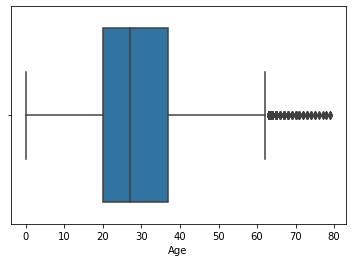

In [693]:
sns.boxplot(df['Age'])

In [698]:
#Remove outlier 
max_threshold=df['Age'].quantile(.99)
max_threshold

65.0

In [699]:
df['Age'].describe()

count    8693.000000
mean       28.827930
std        14.339054
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [700]:
new_df=df[df['Age']<max_threshold]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


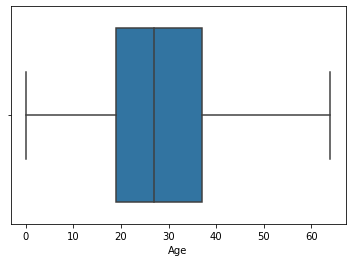

In [701]:
sns.boxplot(new_df['Age'])

In [689]:
df['Cabin'].mode()

0    G/734/S
dtype: object

In [690]:
df['Cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [612]:
df=df.dropna()
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [692]:
df.duplicated().any()

False

In [613]:
df.shape
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [614]:
df['GroupID']=df.PassengerId.str.split('_',expand=True)[0]
df['NumID']=df.PassengerId.str.split('_',expand=True)[1]

In [615]:
display(df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,NumID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.


In [616]:
df[['deck','num','side']]=df.Cabin.str.split('/',expand=True).rename(columns={0:'deck',1:'num',2:'side'})
df.drop('Cabin',axis=1 ,inplace=True)

In [617]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,NumID,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S


HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

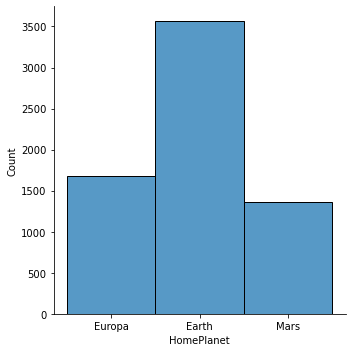

In [618]:
df.HomePlanet.unique()
sns.displot(df['HomePlanet'])

In [619]:
Home_count=df['HomePlanet'].value_counts()
Home_count

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [620]:
HomePercent=Home_count/len(df)
HomePercent

Earth     0.539812
Europa    0.253255
Mars      0.206933
Name: HomePlanet, dtype: float64

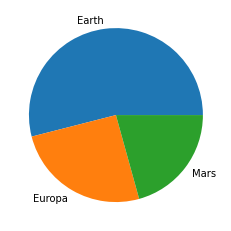

In [621]:
mylabels= ['Earth','Europa','Mars']
plt.pie(HomePercent, labels=mylabels)
plt.show()

Name - The first and last names of the passenger.

In [622]:
df['Surname']=df['Name'].str.split(' ',expand=True)[1]


In [623]:
Surname_count=df.Surname.value_counts()
Surname_count

Casonston    17
Oneiles      15
Litthews     13
Garnes       13
Domington    13
             ..
Connelson     1
Horbox        1
Coillery      1
Stivelte      1
Redand        1
Name: Surname, Length: 2112, dtype: int64

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [624]:
df['Transported'].replace({False:0,True:1},inplace=True)
df['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

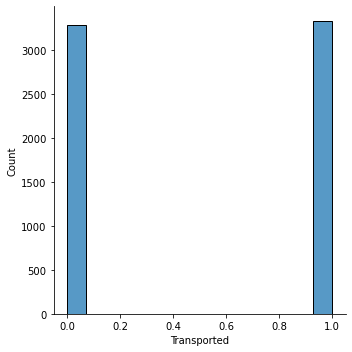

In [625]:
sns.displot(df['Transported'])

In [626]:
trans_count=df['Transported'].value_counts()
trans_count

1    3327
0    3279
Name: Transported, dtype: int64

In [627]:
trans_percentage=trans_count*100/len(df)
trans_percentage

1    50.363306
0    49.636694
Name: Transported, dtype: float64

In [628]:
#target=df['Transported']
#df.drop(['Transported'],axis=1,inplace=True)
#df

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [629]:
df['CryoSleep']= df['CryoSleep'].astype(int)
df['CryoSleep'].replace({False:0,True:1})

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 6606, dtype: int32

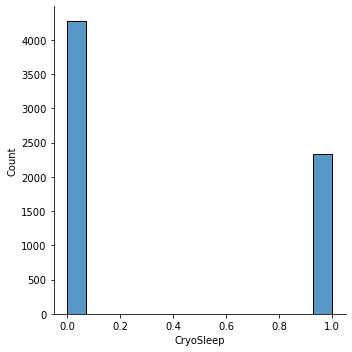

In [630]:
sns.displot(df['CryoSleep'])

In [631]:
sleep_count=df['CryoSleep'].value_counts()
sleep_count


0    4274
1    2332
Name: CryoSleep, dtype: int64

In [632]:
sleep_percentage=sleep_count*100/len(df)
sleep_percentage

0    64.698759
1    35.301241
Name: CryoSleep, dtype: float64

In [713]:
scaler=MinMaxScaler()
df['CryoSleep']=scaler.fit_transform(df['CryoSleep'].to_numpy().reshape(-1,1))

In [714]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Destination - The planet the passenger will be debarking to.

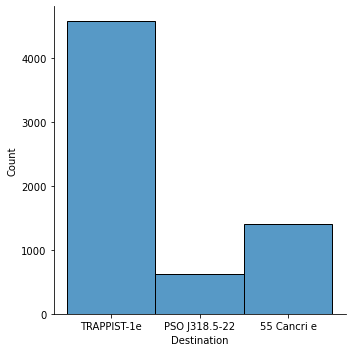

In [633]:
sns.displot(df['Destination'])

In [634]:
dest_count=df['Destination'].value_counts()
dest_count

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [635]:
dest_percenatge=dest_count*100/len(df)
dest_percenatge 

TRAPPIST-1e      69.270360
55 Cancri e      21.298819
PSO J318.5-22     9.430820
Name: Destination, dtype: float64

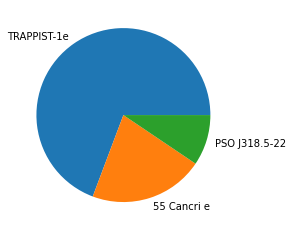

In [636]:
mylabels= ['TRAPPIST-1e','55 Cancri e ','PSO J318.5-22 ']
plt.pie(dest_percenatge, labels=mylabels)
plt.show()

VIP - Whether the passenger has paid for special VIP service during the voyage.

In [637]:
df['VIP'].replace({False: 0 ,True: 1})

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 6606, dtype: int64

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

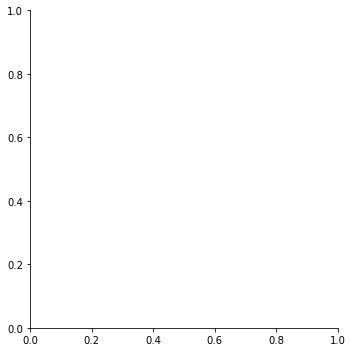

In [638]:
sns.displot(df['VIP'])

In [640]:
vip_count=df['VIP'].value_counts()
vip_count

False    6444
True      162
Name: VIP, dtype: int64

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


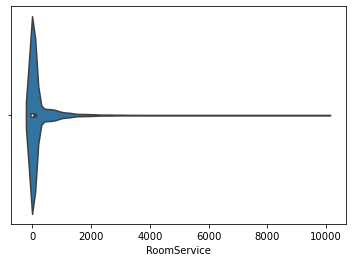

In [641]:
sns.violinplot(df['RoomService'])

In [642]:
maximum_roomservice=df['RoomService'].max()
print(maximum_roomservice)




9920.0


In [643]:
df['RoomService_Levels']=pd.cut(x=df['RoomService'], bins=[-1,2000,4000,8000] ,labels=['WorldClass','Mid-Range','LimitedService'])
df['RoomService_Levels']


0       WorldClass
1       WorldClass
2       WorldClass
3       WorldClass
4       WorldClass
           ...    
8688    WorldClass
8689    WorldClass
8690    WorldClass
8691    WorldClass
8692    WorldClass
Name: RoomService_Levels, Length: 6606, dtype: category
Categories (3, object): ['WorldClass' < 'Mid-Range' < 'LimitedService']

ConversionError: Failed to convert value(s) to axis units: 0       WorldClass
1       WorldClass
2       WorldClass
3       WorldClass
4       WorldClass
           ...    
6601    WorldClass
6602    WorldClass
6603    WorldClass
6604    WorldClass
6605    WorldClass
Name: x, Length: 6606, dtype: category
Categories (3, object): ['WorldClass' < 'Mid-Range' < 'LimitedService']

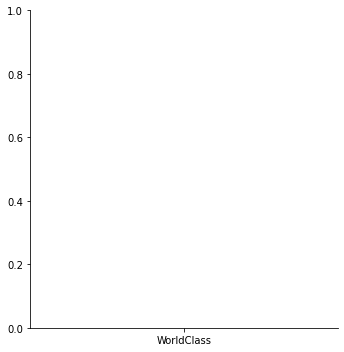

In [644]:
sns.displot(df['RoomService_Levels'])

In [645]:
room_service_count=df['RoomService_Levels'].value_counts()
room_service_count

WorldClass        6441
Mid-Range          133
LimitedService      27
Name: RoomService_Levels, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


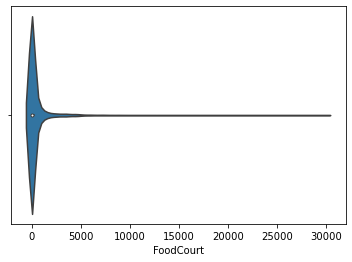

In [646]:
sns.violinplot(df['FoodCourt'])

In [647]:
max_food=df['FoodCourt'].max()
max_food

29813.0

In [648]:
df['FoodCourtGroup']=pd.cut(x=df['FoodCourt'],bins=[-1,3000,20000,50000],labels=['low','med','high'])
df['FoodCourtGroup']

0       low
1       low
2       med
3       low
4       low
       ... 
8688    med
8689    low
8690    low
8691    low
8692    med
Name: FoodCourtGroup, Length: 6606, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

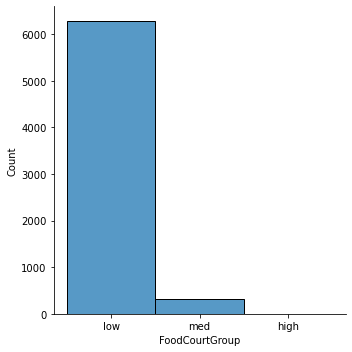

In [649]:
sns.displot(df['FoodCourtGroup'])

In [650]:
food_court_count=df['FoodCourtGroup'].value_counts()
food_court_count

low     6282
med      320
high       4
Name: FoodCourtGroup, dtype: int64

In [651]:
df['FoodCourtGroup'].replace({'low':1 ,'med':2 ,"high":3 },inplace=True)
df['FoodCourtGroup']

0       1
1       1
2       2
3       1
4       1
       ..
8688    2
8689    1
8690    1
8691    1
8692    2
Name: FoodCourtGroup, Length: 6606, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


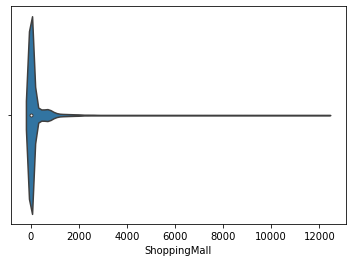

In [653]:
sns.violinplot(df['ShoppingMall'])

In [654]:
max_shop=df['ShoppingMall'].max()
max_shop

12253.0

In [655]:
df['ShoppingMallGroup']=pd.cut(x=df['ShoppingMall'],bins=[-1,3000,10000,120000],labels=['low','med','high'])
df['ShoppingMallGroup']

0       low
1       low
2       low
3       low
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: ShoppingMallGroup, Length: 6606, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

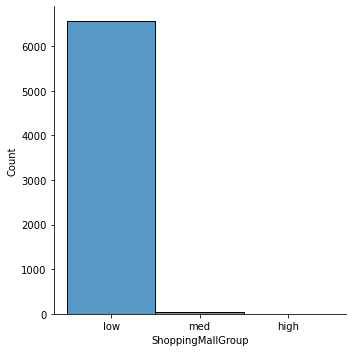

In [656]:
sns.displot(df['ShoppingMallGroup'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


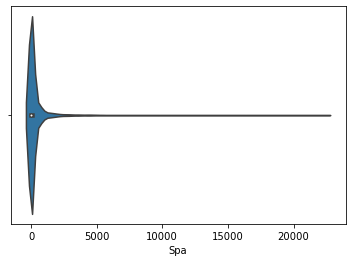

In [657]:
sns.violinplot(df['Spa'])

In [658]:
Spa_max=df['Spa'].max()
Spa_max

22408.0

In [659]:
df['Spa_group']=pd.cut(x=df['Spa'], bins=[-1,3000,20000,23000],labels=['low','med','high'])
df['Spa_group']

0       low
1       low
2       med
3       med
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: Spa_group, Length: 6606, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [660]:
spa_count=df['Spa_group'].value_counts()
spa_count

low     6434
med      171
high       1
Name: Spa_group, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


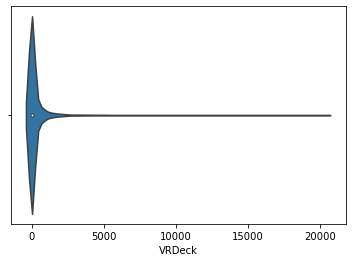

In [661]:
sns.violinplot(df['VRDeck'])

In [662]:
vr_max=df['VRDeck'].max()
vr_max

20336.0

In [663]:
df['VRD_group']=pd.cut(x=df['Spa'], bins=[-1,3000,15000,20000],labels=['low','med','high'])
df['VRD_group']

0       low
1       low
2       med
3       med
4       low
       ... 
8688    low
8689    low
8690    low
8691    low
8692    low
Name: VRD_group, Length: 6606, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

ConversionError: Failed to convert value(s) to axis units: 0       low
1       low
2       med
3       med
4       low
       ... 
6601    low
6602    low
6603    low
6604    low
6605    low
Name: x, Length: 6606, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

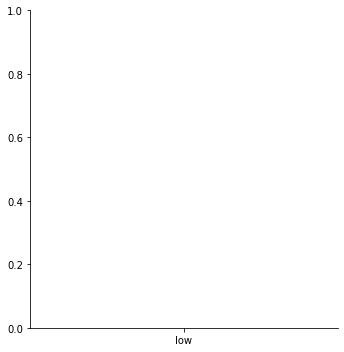

In [664]:
sns.displot(df['VRD_group'])

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         6606 non-null   object  
 1   HomePlanet          6606 non-null   object  
 2   CryoSleep           6606 non-null   int32   
 3   Destination         6606 non-null   object  
 4   Age                 6606 non-null   float64 
 5   VIP                 6606 non-null   object  
 6   RoomService         6606 non-null   float64 
 7   FoodCourt           6606 non-null   float64 
 8   ShoppingMall        6606 non-null   float64 
 9   Spa                 6606 non-null   float64 
 10  VRDeck              6606 non-null   float64 
 11  Name                6606 non-null   object  
 12  Transported         6606 non-null   int64   
 13  GroupID             6606 non-null   object  
 14  NumID               6606 non-null   object  
 15  deck                6606 non-null   ob

In [666]:
from sklearn.model_selection import train_test_split

Define x and y

In [667]:
x_train, x_test, y_train, y_test=train_test_split(df,target)

In [671]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4954, 24)
(1652, 24)
(4954,)
(1652,)


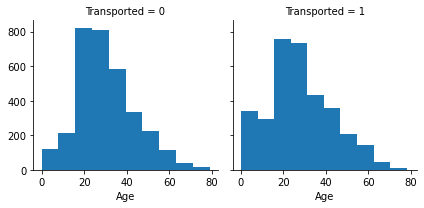

In [674]:
g=sns.FacetGrid(df,col='Transported')
g.map(plt.hist,'Age')